<a href="https://colab.research.google.com/github/baut-jc/Cohort-18-Projects/blob/main/P2_Housing_v02_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction

## Problem Definition


This is a supervised learning problem because we are working with labeled data — the target variable `SalePrice` is known.

  Type: **Regression**

  Goal: Predict a continuous numerical value `SalePrice` using various input features (like square footage, neighborhood, overall quality, etc.)

Data Collection/Sources

### Resource

 [Data Documentation](https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [ ]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
house = pd.read_csv( url )

 ### S.H.I.D --> Shape, Head, Info, Describe

In [ ]:
house.shape

(2637, 81)

In [ ]:
house.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [ ]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


## Data Cleaning


In [ ]:
# make a copy
house_clean = house.copy()

In [ ]:
# check ALL nulls
house_clean = house.copy()
house_clean.isna().sum().sum()

np.int64(14208)

In [ ]:
 # shows % of nulls per columns/feature
nulls = house_clean.isnull().sum()
filter = nulls > 0
( nulls[ filter ].sort_values( ascending = False ) / house_clean.shape[0] * 100 ).round(1)

,0
Pool QC,99.6
Misc Feature,96.4
Alley,93.2
Fence,80.0
Mas Vnr Type,60.9
Fireplace Qu,48.7
Lot Frontage,17.0
Garage Cond,5.6
Garage Yr Blt,5.6
Garage Finish,5.6


In [ ]:
# Dropped columns w/ 20% or more nulls
drop_column = (( nulls[ filter ].sort_values( ascending = False ) / house_clean.shape[0] * 100 ).round(1)) >= 20
columns_to_drop = drop_column[drop_column].index
house_clean = house_clean.drop(columns=columns_to_drop)
house_clean

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,Reg,Bnk,AllPub,Inside,...,0,0,126,0,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,WD,Normal,165000


In [ ]:
# Compute the correlation matrix
corr_matrix = house_clean.corr(numeric_only=True)
corr_matrix

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,0.003801,-0.106530,0.023266,-0.268516,0.107860,-0.352929,-0.160465,-0.243582,-0.110868,...,-0.046697,-0.076038,0.172077,-0.016320,-0.028301,-0.002713,-0.016698,-0.051828,0.016902,-0.258332
MS SubClass,0.003801,1.000000,-0.421410,-0.220406,0.046362,-0.069494,0.036241,0.042770,0.000571,-0.051380,...,-0.016255,-0.011079,-0.027317,-0.035452,-0.048090,-0.005281,-0.016237,-0.006331,-0.015536,-0.078857
Lot Frontage,-0.106530,-0.421410,1.000000,0.589199,0.208400,-0.068218,0.129555,0.103348,0.223228,0.212286,...,0.119160,0.164550,-0.010544,0.020147,0.069019,0.160367,0.013259,0.023390,-0.005627,0.357142
Lot Area,0.023266,-0.220406,0.589199,1.000000,0.095071,-0.029723,0.030558,0.032820,0.137314,0.188551,...,0.180943,0.118606,0.017355,0.022052,0.053741,0.101980,0.053556,0.015153,-0.027787,0.268516
Overall Qual,-0.268516,0.046362,0.208400,0.095071,1.000000,-0.089281,0.595225,0.571035,0.422037,0.267938,...,0.245627,0.295126,-0.153659,0.013418,0.028213,0.026957,-0.036647,0.042192,-0.020052,0.805016
Overall Cond,0.107860,-0.069494,-0.068218,-0.029723,-0.089281,1.000000,-0.359411,0.048439,-0.132828,-0.039678,...,0.030796,-0.068209,0.079232,0.045597,0.053407,-0.009012,0.030705,-0.009906,0.042123,-0.095205
Year Built,-0.352929,0.036241,0.129555,0.030558,0.595225,-0.359411,1.000000,0.614758,0.310158,0.270672,...,0.220759,0.186176,-0.387146,0.013311,-0.056855,0.010353,-0.032083,0.014814,-0.014875,0.562777
Year Remod/Add,-0.160465,0.042770,0.103348,0.032820,0.571035,0.048439,0.614758,1.000000,0.194648,0.141937,...,0.210448,0.233864,-0.231342,0.033512,-0.054408,-0.014081,-0.034232,0.023667,0.035704,0.539932
Mas Vnr Area,-0.243582,0.000571,0.223228,0.137314,0.422037,-0.132828,0.310158,0.194648,1.000000,0.285887,...,0.152719,0.134065,-0.106207,0.025331,0.056370,0.011071,-0.025572,0.001584,-0.016366,0.506402
BsmtFin SF 1,-0.110868,-0.051380,0.212286,0.188551,0.267938,-0.039678,0.270672,0.141937,0.285887,1.000000,...,0.217693,0.100365,-0.101918,0.070826,0.081536,0.093960,0.016907,-0.001286,0.027120,0.427809


In [ ]:
house_clean

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,Reg,Bnk,AllPub,Inside,...,0,0,126,0,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,WD,Normal,165000


## Exploratory Data Analysis

In [ ]:
# Focus only on SalePrice correlations
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Get top 10 most correlated features (including SalePrice itself)
top_corr_features = saleprice_corr.head(10).index

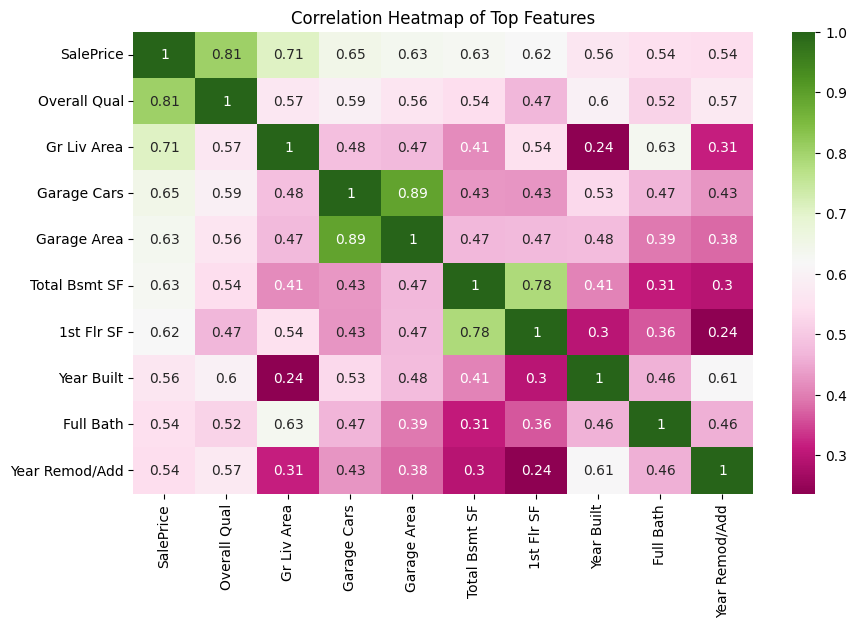

In [ ]:
# Plot heatmap of top correlated features
plt.figure(figsize=(10, 6))
sns.heatmap(house_clean[top_corr_features].corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap of Top Features')
plt.show()

/tmp/ipython-input-15-970073912.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis') ;


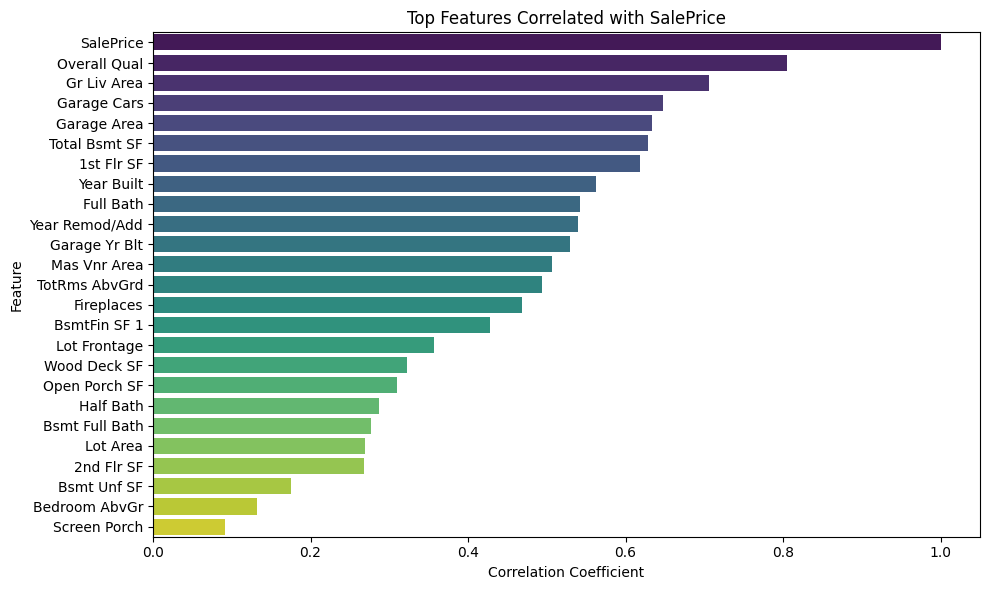

In [ ]:
# Optional: select top N features
top_corr = saleprice_corr.head(25)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis') ;

plt.title('Top Features Correlated with SalePrice') ;
plt.xlabel('Correlation Coefficient') ;
plt.ylabel('Feature') ;
plt.tight_layout() ;
plt.show() ;

In [ ]:
house_clean

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,Reg,Bnk,AllPub,Inside,...,0,0,126,0,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,WD,Normal,165000


## Feature Selection

In [1]:
columns_to_keep = ['Overall Qual', 'SalePrice','Gr Liv Area', 'Garage Cars', 'Garage Area',
                   'Total Bsmt SF', '1st Flr SF']
house_clean2 = house_clean[columns_to_keep]
house_clean2

NameError: name 'house_clean' is not defined

/tmp/ipython-input-18-4222727430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_with_price.values, y=corr_with_price.index, palette='coolwarm')


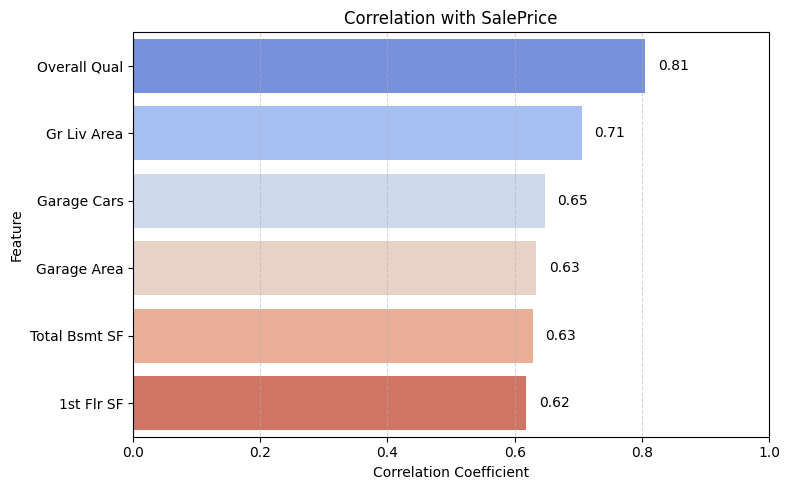

In [ ]:
# Compute correlations with SalePrice
corr_with_price = house_clean2.corr()['SalePrice'].drop('SalePrice')

# Sort by absolute correlation (optional, for better visualization)
corr_with_price = corr_with_price.reindex(corr_with_price.abs().sort_values(ascending=False).index)

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=corr_with_price.values, y=corr_with_price.index, palette='coolwarm')

# Annotate each bar with correlation value
for i, (value, name) in enumerate(zip(corr_with_price.values, corr_with_price.index)):
    ax.text(value + 0.02 if value >= 0 else value - 0.02, i, f'{value:.2f}',
            color='black', va='center', ha='left' if value >= 0 else 'right')

plt.title('Correlation with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
house_clean2['SalePrice']

,SalePrice
0,115400
1,90000
2,141000
3,254000
4,155000
...,...
2632,114500
2633,162000
2634,211500
2635,165000


In [ ]:
house_clean2.dtypes.sort_values()

,0
Overall Qual,int64
SalePrice,int64
Gr Liv Area,int64
1st Flr SF,int64
Garage Cars,float64
Garage Area,float64
Total Bsmt SF,float64


In [ ]:
house_clean2.describe()

,Overall Qual,SalePrice,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF
count,2637.000000,2637.000000,2637.000000,2636.000000,2636.000000,2636.000000,2637.000000
mean,6.097459,179986.230186,1496.985210,1.763278,470.968134,1045.179059,1155.505878
std,1.411522,78309.251522,495.209631,0.760576,212.816905,429.686089,382.597499
min,1.000000,12789.000000,334.000000,0.000000,0.000000,0.000000,334.000000
25%,5.000000,129500.000000,1128.000000,1.000000,324.750000,792.000000,878.000000
50%,6.000000,160000.000000,1441.000000,2.000000,480.000000,988.000000,1082.000000
75%,7.000000,213000.000000,1740.000000,2.000000,576.000000,1290.250000,1380.000000
max,10.000000,745000.000000,5642.000000,5.000000,1488.000000,6110.000000,4692.000000


In [ ]:
house_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2637 non-null   int64  
 1   SalePrice      2637 non-null   int64  
 2   Gr Liv Area    2637 non-null   int64  
 3   Garage Cars    2636 non-null   float64
 4   Garage Area    2636 non-null   float64
 5   Total Bsmt SF  2636 non-null   float64
 6   1st Flr SF     2637 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 144.3 KB


In [ ]:
house_clean2.fillna(0, inplace=True)
house_clean2

/tmp/ipython-input-23-752585374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_clean2.fillna(0, inplace=True)


,Overall Qual,SalePrice,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF
0,4,115400,1005,2.0,440.0,1005.0,1005
1,4,90000,1296,2.0,516.0,0.0,1296
2,6,141000,1375,1.0,544.0,780.0,780
3,8,254000,1848,2.0,592.0,975.0,975
4,7,155000,1135,2.0,576.0,560.0,575
...,...,...,...,...,...,...,...
2632,6,114500,1176,2.0,528.0,816.0,816
2633,7,162000,1061,2.0,462.0,1054.0,1061
2634,8,211500,1226,2.0,484.0,1226.0,1226
2635,6,165000,1350,2.0,478.0,1064.0,1350


In [ ]:
house_clean2.isnull().sum()

,0
Overall Qual,0
SalePrice,0
Gr Liv Area,0
Garage Cars,0
Garage Area,0
Total Bsmt SF,0
1st Flr SF,0


## Processing

In [ ]:
# define x & y in new df
x = house_clean2.drop('SalePrice', axis=1)
y = house_clean2['SalePrice']

In [ ]:
# Perform CV
n = 100
results = np.zeros(n)
for idx in range(n):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
  model = LinearRegression()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {results.mean().round(2)}")
print(f"Number of Predictors: {len(x.columns)}")

CV RMSE: 35680.64
Number of Predictors: 6


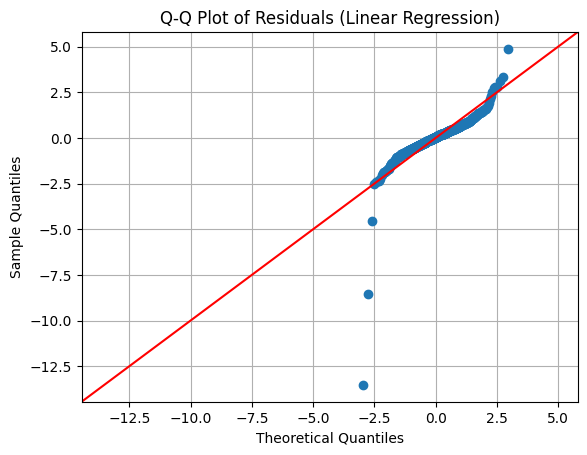

In [ ]:
# Calculate residuals
res = y_test - y_pred

# Q-Q plot to check normality of residuals
fig = sm.qqplot(res, line='45', fit=True)
plt.title("Q‑Q Plot of Residuals (Linear Regression)")
plt.grid(True)
plt.show()

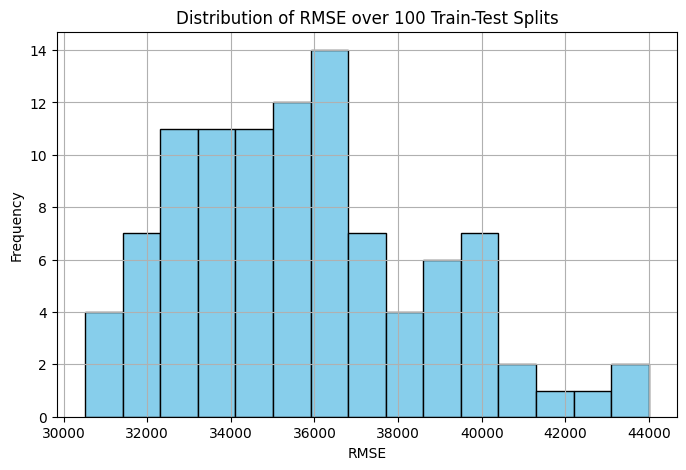

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(results, bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of RMSE over 100 Train-Test Splits')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

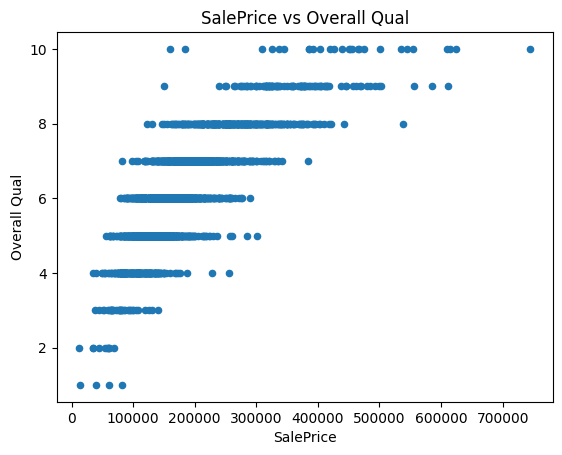

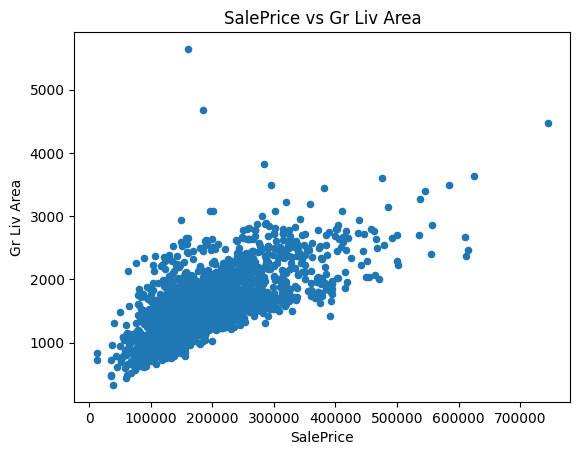

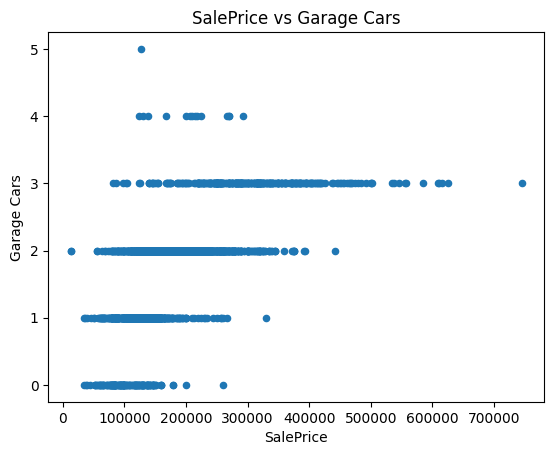

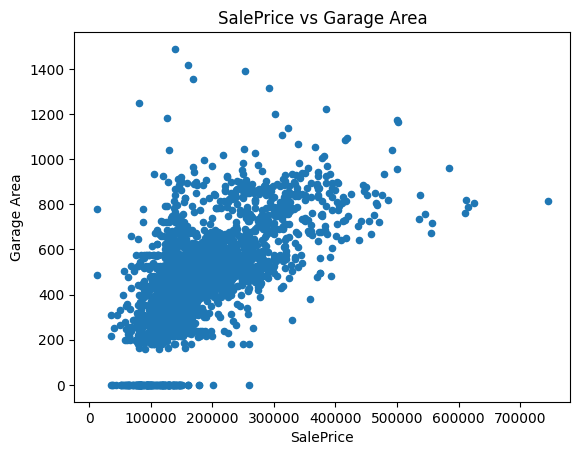

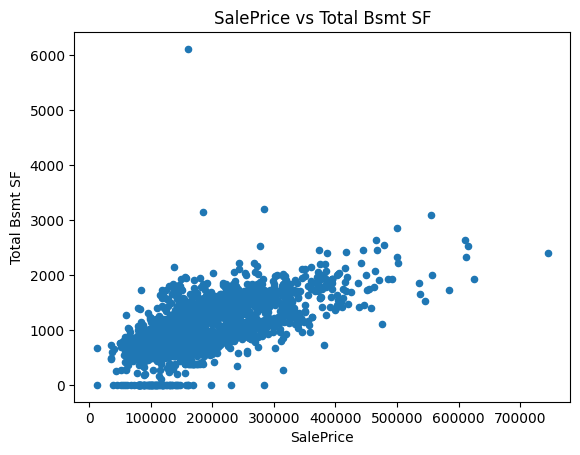

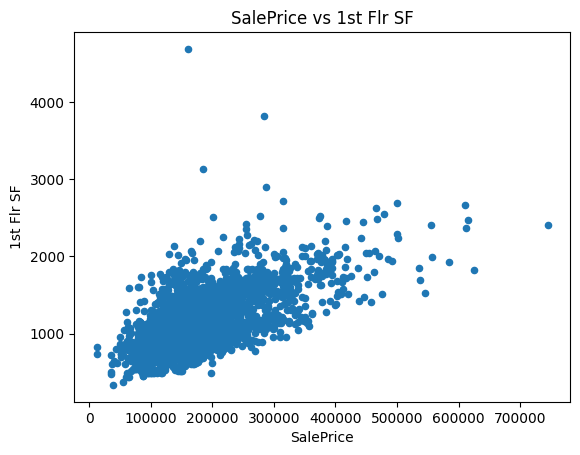

In [ ]:
features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']

for feature in features:
    house_clean2.plot(kind='scatter', x='SalePrice', y=feature, title=f'SalePrice vs {feature}')
    plt.show()

## Data Visualization/Communication of Results

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-1.48623738, -0.9936772 ,  0.31192044, -0.1445968 , -0.09251687,
        -0.39345376],
       [-1.48623738, -0.40593582,  0.31192044,  0.21232178, -2.42969959,
         0.36728094],
       [-0.06905858, -0.24637717, -1.00203196,  0.3438181 , -0.61576674,
        -0.98165069],
       ...,
       [ 1.34812022, -0.54731691,  0.31192044,  0.06204028,  0.42143077,
         0.18428634],
       [-0.06905858, -0.29687041,  0.31192044,  0.03386249,  0.04469087,
         0.5084482 ],
       [ 0.63953082,  1.66630698,  0.31192044, -0.33244868, -0.01809911,
        -0.30979908]])

In [ ]:
x.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF'],
      dtype='object')

In [ ]:
X_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)

In [ ]:
x.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF
0,4,1005,2.0,440.0,1005.0,1005
1,4,1296,2.0,516.0,0.0,1296
2,6,1375,1.0,544.0,780.0,780
3,8,1848,2.0,592.0,975.0,975
4,7,1135,2.0,576.0,560.0,575


In [ ]:
X_scaled.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF
0,-1.486237,-0.993677,0.311920,-0.144597,-0.092517,-0.393454
1,-1.486237,-0.405936,0.311920,0.212322,-2.429700,0.367281
2,-0.069059,-0.246377,-1.002032,0.343818,-0.615767,-0.981651
3,1.348120,0.708955,0.311920,0.569240,-0.162284,-0.471880
4,0.639531,-0.731112,0.311920,0.494100,-1.127389,-1.517563


In [ ]:
# Fit a linear model using Sklearn
model = LinearRegression()
my_fit_lr = model.fit(X_train, y_train)

In [ ]:
# Create a data frame with the results from the linear regression models
model_results = pd.DataFrame()
model_results['Predictor'] = X_train.columns
model_results['Linear'] = my_fit_lr.coef_
model_results.sort_values(by=['Linear'],inplace=True, ascending=False)
model_results

,Predictor,Linear
0,Overall Qual,35408.980602
1,Gr Liv Area,20895.499153
4,Total Bsmt SF,9909.633124
2,Garage Cars,8380.727260
5,1st Flr SF,6672.282921
3,Garage Area,4810.691023


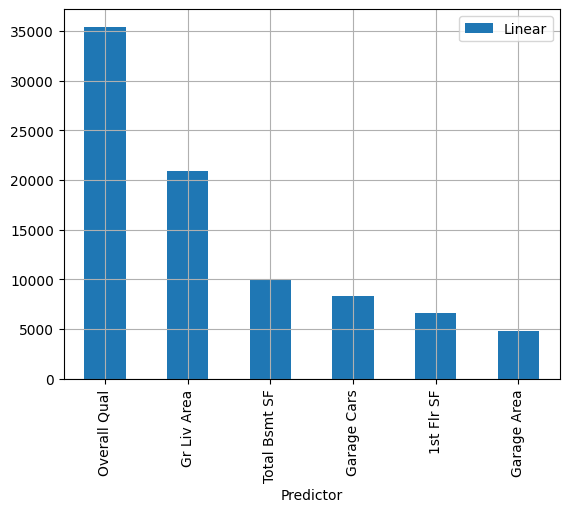

In [ ]:
# We can even plot the coefficients if we want to!
model_results.plot(x = 'Predictor', y = 'Linear', kind = 'bar')
plt.grid()

Overall Quality has the biggst effect on Sale Price.

In [ ]:
# Calculate CV RMSE
results = cross_val_score(
    model,
    X_scaled,
    y,
    scoring='neg_root_mean_squared_error',
    cv = 10
    )
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 35751.43010468321


Ridge Regression

In [ ]:
# Train the model
my_fit_rr = Ridge(alpha = 1) # Arbitrarily choosing alpha = 1
my_fit_rr.fit(X_train, y_train) ;

In [ ]:
# Calculate RMSE
# Ensure y_test is a Series
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.squeeze()

y_pred = my_fit_rr.predict(X_test)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 31061.348744939296


In [ ]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_rr = Ridge(alpha = i) # Looping through alpha
  my_fit_rr.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_rr,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
      )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

           Alpha          RMSE
15  5.000000e+01  35733.318383
14  3.000000e+01  35737.353421
13  2.000000e+01  35740.913538
12  1.000000e+01  35745.582978
11  5.000000e+00  35748.354783
10  4.000000e+00  35748.945263
9   3.000000e+00  35749.547958
8   2.000000e+00  35750.162945
7   1.000000e+00  35750.790301
6   1.000000e-01  35751.365562
5   1.000000e-02  35751.423645
4   1.000000e-03  35751.429459
3   1.000000e-04  35751.430040
2   1.000000e-08  35751.430105
1   1.000000e-10  35751.430105
0   1.000000e-15  35751.430105


In [ ]:
results_df.sort_values( by = "Alpha")

,Alpha,RMSE
0,1.000000e-15,35751.430105
1,1.000000e-10,35751.430105
2,1.000000e-08,35751.430105
3,1.000000e-04,35751.430040
4,1.000000e-03,35751.429459
5,1.000000e-02,35751.423645
6,1.000000e-01,35751.365562
7,1.000000e+00,35750.790301
8,2.000000e+00,35750.162945
9,3.000000e+00,35749.547958


In [ ]:
# Retrain the model w/ alpha = 15
my_fit_rr = Ridge(alpha = 15)
my_fit_rr.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_rr, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 35743.10547923979


In [ ]:
# Add ridge regression results to data frame we created earlier
model_results['Ridge'] = my_fit_rr.coef_

In [ ]:
model_results

,Predictor,Linear,Ridge
0,Overall Qual,35408.980602,35077.333607
1,Gr Liv Area,20895.499153,20826.434672
4,Total Bsmt SF,9909.633124,8411.241802
2,Garage Cars,8380.727260,4923.353646
5,1st Flr SF,6672.282921,9938.352039
3,Garage Area,4810.691023,6728.416828


Regularization - Lasso Regression

In [ ]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=100_000) # Looping through alpha
  my_fit_lasso.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_lasso,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
  )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+12, tolerance: 1.325e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.542e+12, tolerance: 1.461e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.498e+12, tolerance: 1.438e

           Alpha          RMSE
15  5.000000e+01  35746.037076
14  3.000000e+01  35747.502698
13  2.000000e+01  35749.253990
12  1.000000e+01  35750.258667
11  5.000000e+00  35750.969986
10  4.000000e+00  35751.046143
9   3.000000e+00  35751.137741
8   2.000000e+00  35751.327559
7   1.000000e+00  35751.409475
1   1.000000e-10  35751.430105
0   1.000000e-15  35751.430105
2   1.000000e-08  35751.430105
3   1.000000e-04  35751.430108
4   1.000000e-03  35751.430139
5   1.000000e-02  35751.430461
6   1.000000e-01  35751.432445


In [ ]:
results_df

,Alpha,RMSE
0,1.000000e-15,35751.430105
1,1.000000e-10,35751.430105
2,1.000000e-08,35751.430105
3,1.000000e-04,35751.430108
4,1.000000e-03,35751.430139
5,1.000000e-02,35751.430461
6,1.000000e-01,35751.432445
7,1.000000e+00,35751.409475
8,2.000000e+00,35751.327559
9,3.000000e+00,35751.137741


In [ ]:
# Train the model
my_fit_lasso = Lasso(alpha = 15, tol = .01, max_iter=1000000)
my_fit_lasso.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_lasso, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 35749.82462501645


In [ ]:
# Add Lasso results to the data frame we created before
model_results['Lasso'] = my_fit_lasso.coef_

In [ ]:
model_results

,Predictor,Linear,Ridge,Lasso
0,Overall Qual,35408.980602,35077.333607,35384.182273
1,Gr Liv Area,20895.499153,20826.434672,20888.909126
4,Total Bsmt SF,9909.633124,8411.241802,8451.642781
2,Garage Cars,8380.727260,4923.353646,4745.608895
5,1st Flr SF,6672.282921,9938.352039,9921.734971
3,Garage Area,4810.691023,6728.416828,6664.197142


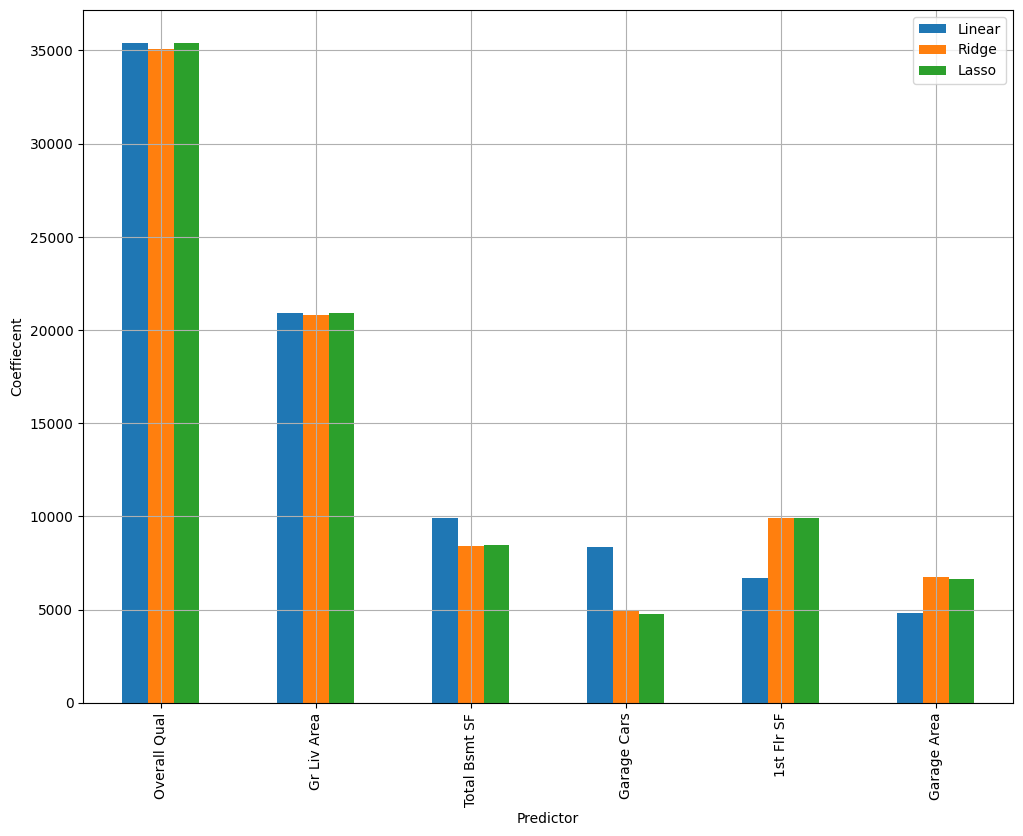

In [ ]:
# Plot results
fig, ax = plt.subplots(1,1, figsize = (12,9))
model_results.plot(x = 'Predictor', kind = 'bar', ax = ax)
ax.set_ylabel('Coeffiecent')
plt.grid()

### Communication of Results

[Housing Price Prediction Slides](https://docs.google.com/presentation/d/e/2PACX-1vSxqqYyXEGfU7KIZbWWAFFnvx6V4JDEbXo7K986x3wTvWBNi43Xc_not8fr-me0pj3w5BSbyN-r8WkG/pub?start=false&loop=false&delayms=3000)
> Something to consider:
- grouping by 'neighborhood'
- this is just the baseline.